N-Queens Problem

In [25]:
import random #imports random library
import pandas as pd #imports pandas
import matplotlib.pyplot as plt #importsmatplotlibrary

In [26]:
# this function is defined to find the number of conflicts for a given configuration
def calculate_conflicts(board):
    conflicts = 0
    n = len(board)

    for i in range(n):
        for j in range(i + 1, n):
            if board[i] == board[j] or abs(board[i] - board[j]) == j - i:
                conflicts += 1
    return conflicts

In [27]:
# this function is to generate a random configuration of queens
def random_queen_configuration(n):
    return [random.randint(0, n - 1) for _ in range(n)]

In [28]:
# this function is defined to perform hill climbing search for the N-Queens solution
def hill_climbing(n):
    board = random_queen_configuration(n)
    conflicts = calculate_conflicts(board)

    if conflicts == 0:
        return board

    while True:
        best_board = None
        best_conflicts = conflicts

        for row in range(n):
            for col in range(n):
                if col == board[row]:
                    continue

                new_board = board[:]
                new_board[row] = col
                new_conflicts = calculate_conflicts(new_board)

                if new_conflicts < best_conflicts:
                    best_conflicts = new_conflicts
                    best_board = new_board

        if best_conflicts == conflicts:
            break

        board = best_board
        conflicts = best_conflicts

        if conflicts == 0:
            return board

    return board

In [29]:
#displaying the board in a human-readable way
def display_board(board):
    n = len(board)
    for i in range(n):
        row = ['Q' if j == board[i] else '.' for j in range(n)]
        print(' '.join(row))

In [30]:
# to test the solution for different values of N
def solve_n_queens(n):
    solution = hill_climbing(n)
    display_board(solution)
    print("\nSolution found!")

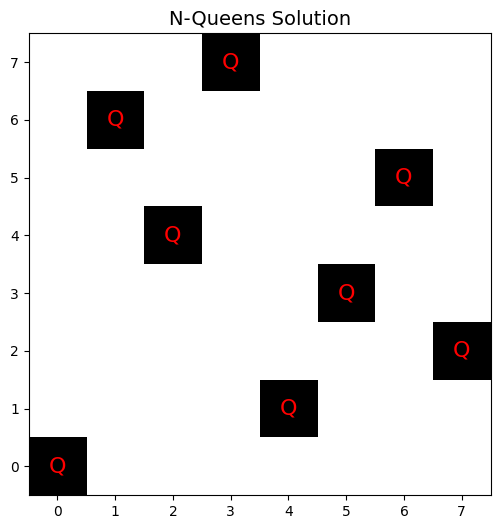

In [31]:
# Function to generate the chessboard as a Pandas DataFrame
def create_chessboard(board):
    """
    Create a DataFrame representation of the chessboard.
    Rows and columns with queens will be marked as 1, others as 0.
    """
    n = len(board)
    chessboard = [[0] * n for _ in range(n)]

    for i, col in enumerate(board):
        chessboard[i][col] = 1  # Mark the queen's position as 1

    df = pd.DataFrame(chessboard)
    return df

# Function to visualize the N-Queens board
def visualize_n_queens(board):
    """
    Visualize the N-Queens board using Matplotlib.
    """
    df = create_chessboard(board)
    plt.figure(figsize=(6, 6))
    plt.imshow(df, cmap="Greys", interpolation="nearest")

    # Add the queens as red markers
    for i, col in enumerate(board):
        plt.text(col, i, "Q", ha="center", va="center", color="red", fontsize=16)

    plt.title("N-Queens Solution", fontsize=14)
    plt.xticks(range(len(board)))  # Show column indices
    plt.yticks(range(len(board)))  # Show row indices
    plt.gca().invert_yaxis()  # Invert y-axis to match chessboard convention
    plt.show()

# Example N-Queens solution
if __name__ == "__main__":
    # Example board configuration for N = 8
    solution = [0, 4, 7, 5, 2, 6, 1, 3]  # A valid solution for the 8-Queens problem
    visualize_n_queens(solution)


In [34]:
# Example usage
if __name__ == "__main__":
    try:
      while True:
        n=int(input("Enter Value of N = "))
        print("\nSolution for N = ",n,":\n")
        solve_n_queens(n)
    except:
      print("Error !")

Enter Value of N = 3

Solution for N =  3 :

Q . .
. . Q
Q . .

Solution found!
Enter Value of N = 7

Solution for N =  7 :

. . . . . Q .
. Q . . . . .
. . . . Q . .
Q . . . . . .
. . . Q . . .
. . . . . . Q
. . Q . . . .

Solution found!
Enter Value of N = 8

Solution for N =  8 :

. . . . . Q . .
. . Q . . . . .
Q . . . . . . .
. . . . . . . Q
. . . . Q . . .
. . . . . . . Q
. Q . . . . . .
. . . . . . Q .

Solution found!
Enter Value of N = 10

Solution for N =  10 :

. . . . . . . . Q .
. . . . Q . . . . .
Q . . . . . . . . .
. . . . . . . . . Q
. . . . . . Q . . .
. Q . . . . . . . .
. . . Q . . . . . .
. . . . . . . Q . .
. . . . . . . . . Q
. . Q . . . . . . .

Solution found!
Enter Value of N = x
Error !
